# Appendix 3: Python code for Greedy K center Algorithm 

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import time

$\textbf{Function for Greedy K centers }$

In [2]:
#Function for initializing Greedy K centers
#Input: data - Data Matrix, K - no. of clusters
def GreedyK(data, K):
    C = [list(random.choice(data))]
    C_assign = np.zeros(data.shape[0])
    D_p = np.array(norm(data-C))
    for i in range(1, K):
        c_idx = np.argmax(D_p)
        C.append((list(data[c_idx])))
        D_p_new = np.minimum(D_p, norm(data-C[-1])) #Distance from the nearest center 
        C_assign[np.where(D_p_new!=D_p)] = i
        D_p = D_p_new
        Dist = max(D_p) #Distance/Cost
    return C, C_assign, Dist

In [3]:
def read_data(path):
    data = pd.read_csv(path, header = None)
    data = np.asarray(data)
    return data

In [4]:
#Function to compute the norm of each vector in the matrix
def norm(mat):
    return np.sqrt(np.sum(mat**2, axis = 1))

In [5]:
#Plotting the clusters and the centroids 
#Input: X - Data Matrix, Y - Centroids, C - Cluster assignment
def plot_clusters(X, Y, C):
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=C)
    plt.plot(Y[:,0],Y[:,1], 'Xr', label = 'Centroids')
    plt.title('K Means Clustering for K = '+ str(len(Y)))
    plt.legend()
    plt.savefig('Results\K_centers\Data2_'+ str(len(Y)))
    plt.show()

Enter the path to the dataset: Dataset 1/clustering.csv
Enter the no. of clusters required: 2


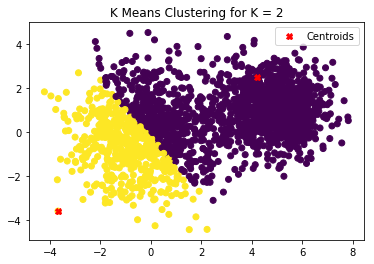

Clusters:  [ 1.  1.  1.  1.  0.  0.  0.  1.  0.  0.]
Cost function =  6.60068850121
Running time = 0.0004649876543209877


In [6]:
data = read_data(input('Enter the path to the dataset: '))
K = int(input('Enter the no. of clusters required: '))
start = time.clock()
C, C_assign, Dist = GreedyK(data, K)
end = time.clock()
plot_clusters(data,np.array(C),C_assign)
print ('Clusters: ', C_assign[:10])
print ('Cost function = ', Dist)
print ('Running time =', end - start)

Enter the path to the dataset: Dataset_2/ShapedData.csv
Enter the no. of clusters required: 4


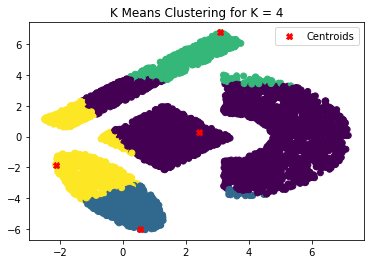

Clusters:  [ 0.  0.  0.  3.  1.  3.  0.  0.  0.  0.]
Cost function =  4.8295462816
Running time = 0.0014755555555581168


In [7]:
data = read_data(input('Enter the path to the dataset: '))
K = int(input('Enter the no. of clusters required: '))
start = time.clock()
C, C_assign, Dist = GreedyK(data, K)
end = time.clock()
plot_clusters(data,np.array(C),C_assign)
print ('Clusters: ', C_assign[:10])
print ('Cost function = ', Dist)
print ('Running time =', end - start)